<a href="https://colab.research.google.com/github/alina-chak/RESEARCH_PHD/blob/main/LightWeight_CNN_for_CBVR_2_12_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/titania7777/PCA-CBVR.git

Cloning into 'PCA-CBVR'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 73 (delta 22), reused 45 (delta 9), pack-reused 0
Receiving objects: 100% (73/73), 42.03 KiB | 1.56 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
%cd /content/PCA-CBVR

/content/PCA-CBVR


In [ ]:
!pip install ffmpeg-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/RESEARCH/Semantic Feature Based Video Retrieval_Objective2/ucf101_labels.zip", "/content/PCA-CBVR/DB/UCF101/ucf101_labels.zip")

'/content/PCA-CBVR/DB/UCF101/ucf101_labels.zip'

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/RESEARCH/Semantic Feature Based Video Retrieval_Objective2/UCF101.rar", "/content/PCA-CBVR/DB/UCF101/UCF101.rar")

'/content/PCA-CBVR/DB/UCF101/UCF101.rar'

In [ ]:
#For removing access of drive
drive.flush_and_unmount()

In [ ]:
#For removing access of drive
#drive.flush_and_unmount()
#for permanent removal of drive directories
!rm -rf /content/drive

In [ ]:
%cd /content/PCA-CBVR/DB/UCF101

/content/PCA-CBVR/DB/UCF101


In [ ]:
!unrar x UCF101.rar && mv UCF-101 videos && rm -rf UCF101.rar
!unzip ucf101_labels.zip && rm -rf ucf101_labels.zip

Streaming output truncated to the last 5000 lines.
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g09_c04.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c01.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c02.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c03.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c04.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c05.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c06.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g10_c07.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g11_c01.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g11_c02.avi             62%  OK 
Extracting  UCF-101/PlayingGu

In [ ]:
import csv
import os
import shutil

with open("/content/PCA-CBVR/DB/UCF101/labels/custom/categorical/train.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    try:
      if not os.path.exists(f'/content/PCA-CBVR/DB/UCF101/Train/videos/{row[2]}'):
        os.makedirs(f'/content/PCA-CBVR/DB/UCF101/Train/videos/{row[2]}')


    except OSError:
      print ('Error: Creating directory of data')

    #print(row[0])
    shutil.move('/content/PCA-CBVR/DB/UCF101/videos/' + row[0] + '.avi','/content/PCA-CBVR/DB/UCF101/Train/videos/' + row[0] + '.avi')

In [ ]:
import csv
import os

with open("/content/PCA-CBVR/DB/UCF101/labels/custom/categorical/test.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    try:
      if not os.path.exists(f'/content/PCA-CBVR/DB/UCF101/Test/videos/{row[2]}'):
        os.makedirs(f'/content/PCA-CBVR/DB/UCF101/Test/videos/{row[2]}')


    except OSError:
      print ('Error: Creating directory of data')

    #print(row[0])
    shutil.move('/content/PCA-CBVR/DB/UCF101/videos/' + row[0] + '.avi','/content/PCA-CBVR/DB/UCF101/Test/videos/' + row[0] + '.avi')

In [ ]:
import shutil

shutil.rmtree('/content/PCA-CBVR/DB/UCF101/videos')

In [ ]:
import os

classes = os.listdir('/content/PCA-CBVR/DB/UCF101/Train/videos')

print(classes)



['PlayingGuitar', 'Kayaking', 'Rowing', 'JumpingJack', 'TaiChi', 'Biking', 'Skijet']


In [ ]:
import os
import shutil

classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]

dir = os.listdir("/content/PCA-CBVR/DB/UCF101/videos")

for c in classes:
  shutil.move("/content/PCA-CBVR/DB/UCF101/videos/" + c, "/content/PCA-CBVR/DB/UCF101/videos1/" + c)

In [ ]:
%cd /content/PCA-CBVR

/content/PCA-CBVR


In [ ]:
!python preprocess.py

'./DB/UCF101/frames' already exists, do you want to continue after remove that ? [yes(y)/no(n)/skip(s)] y
removing... complete !!
[1] video_path:./DB/UCF101/videos
[2] save_path:./DB/UCF101/frames
[3] frame_size:240
[4] num_workers:-1
895/895 (320x240) -> (320x240) length: 209   name: v_Skijet_g08_c04
'./MetaDB/Categorical/UCF101/WithoutTune/R3D50' already exists, do you want to continue after remove that ? [yes(y)/no(n)/skip(s)] yes
removing... complete !!
[1] frame_path:./DB/UCF101/frames
[2] db_annotation_path:./DB/UCF101/labels/custom/categorical/train.csv
[3] query_annotation_path:./DB/UCF101/labels/custom/categorical/test.csv
[4] save_path:./MetaDB/Categorical/UCF101/WithoutTune/R3D50
[5] model_path:None
[6] model_name:R3D50
[7] shortcut:B
[8] pretrained:True
[9] frame_size:112
[10] sequence_length:16
[11] max_interval:-1
[12] random_interval:False
[13] random_start_position:False
[14] uniform_frame_sample:True
[15] random_pad_sample:False
[16] batch_size:128
[17] only_cpu:False


In [ ]:
import numpy as np

A = []

a = np.load("/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D18/db/Biking/v_Biking_g08_c01.npy")

a.shape

a = np.moveaxis(a, 1, 0)
a = np.moveaxis(a, 1, 2)
a = np.moveaxis(a, 2, 3)

A.append(a)

A = np.asarray(A)
A.shape



(1, 16, 112, 112, 3)

In [ ]:
np.array(X).shape

(1, 16, 112, 112, 3)

In [ ]:
X

array([[[[[3.55167647e-06, 0.00000000e+00, 0.00000000e+00],
          [5.84982008e-06, 1.88029931e-06, 1.67137716e-06],
          [3.50989205e-05, 3.11293997e-05, 3.09204775e-05],
          ...,
          [1.92208374e-05, 2.02654481e-05, 1.92208374e-05],
          [1.92208374e-05, 2.02654481e-05, 1.92208374e-05],
          [1.92208374e-05, 2.02654481e-05, 1.92208374e-05]],

         [[3.76059862e-06, 2.08922146e-07, 0.00000000e+00],
          [4.17844291e-06, 2.08922146e-07, 2.08922146e-07],
          [3.17561661e-05, 2.77866454e-05, 2.75777232e-05],
          ...,
          [2.06832924e-05, 2.19368253e-05, 2.08922146e-05],
          [2.06832924e-05, 2.19368253e-05, 2.08922146e-05],
          [2.06832924e-05, 2.19368253e-05, 2.08922146e-05]],

         [[4.17844291e-06, 2.08922146e-07, 2.08922146e-07],
          [1.67137716e-06, 0.00000000e+00, 0.00000000e+00],
          [2.69509568e-05, 2.29814360e-05, 2.27725139e-05],
          ...,
          [2.27725139e-05, 2.40260467e-05, 2.298143

In [ ]:
A

array([[[[[ 0.7254123 ,  0.76175725,  1.4147092 ],
          [ 0.6829098 ,  0.74730253,  1.2571014 ],
          [ 0.66874224,  0.7328478 ,  1.1281495 ],
          ...,
          [-0.39382154, -0.35125712, -0.23300876],
          [-0.52132916, -0.4813497 , -0.3619606 ],
          [-0.6488368 , -0.6114423 , -0.49091247]],

         [[ 0.61207217,  0.6461194 ,  1.2427734 ],
          [ 0.5979047 ,  0.66057414,  1.1138216 ],
          [ 0.58373713,  0.66057414,  0.9991977 ],
          ...,
          [-0.39382154, -0.35125712, -0.23300876],
          [-0.52132916, -0.4813497 , -0.3619606 ],
          [-0.6488368 , -0.6114423 , -0.49091247]],

         [[ 0.42789447,  0.48711738,  0.9705418 ],
          [ 0.48456454,  0.559391  ,  0.9132298 ],
          [ 0.4562295 ,  0.559391  ,  0.798606  ],
          ...,
          [-0.39382154, -0.35125712, -0.23300876],
          [-0.52132916, -0.4813497 , -0.3619606 ],
          [-0.6488368 , -0.6114423 , -0.49091247]],

         ...,

         [[ 0.13

In [ ]:
X+X

array([[[[[7.10335295e-06, 0.00000000e+00, 0.00000000e+00],
          [1.16996402e-05, 3.76059862e-06, 3.34275433e-06],
          [7.01978409e-05, 6.22587994e-05, 6.18409551e-05],
          ...,
          [3.84416748e-05, 4.05308962e-05, 3.84416748e-05],
          [3.84416748e-05, 4.05308962e-05, 3.84416748e-05],
          [3.84416748e-05, 4.05308962e-05, 3.84416748e-05]],

         [[7.52119724e-06, 4.17844291e-07, 0.00000000e+00],
          [8.35688582e-06, 4.17844291e-07, 4.17844291e-07],
          [6.35123323e-05, 5.55732907e-05, 5.51554464e-05],
          ...,
          [4.13665848e-05, 4.38736506e-05, 4.17844291e-05],
          [4.13665848e-05, 4.38736506e-05, 4.17844291e-05],
          [4.13665848e-05, 4.38736506e-05, 4.17844291e-05]],

         [[8.35688582e-06, 4.17844291e-07, 4.17844291e-07],
          [3.34275433e-06, 0.00000000e+00, 0.00000000e+00],
          [5.39019136e-05, 4.59628720e-05, 4.55450277e-05],
          ...,
          [4.55450277e-05, 4.80520935e-05, 4.596287

In [ ]:
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array

X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True



filename = "/content/PCA-CBVR/DB/UCF101/videos/Biking/v_Biking_g08_c01.avi"
cap = cv2.VideoCapture(filename)
nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
if skip:
    frames = [x * nframe / depth for x in range(depth)]
else:
    frames = [x for x in range(depth)]
framearray = []

for i in range(depth):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
    ret, frame = cap.read()
    frame = cv2.resize(frame, (height, width))
    if color:
        framearray.append(frame)
    else:
        framearray.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

cap.release()
X.append(framearray)
X = np.asarray(X)
X


array([[[[[ 17,   0,   0],
          [ 28,   9,   8],
          [168, 149, 148],
          ...,
          [ 92,  97,  92],
          [ 92,  97,  92],
          [ 92,  97,  92]],

         [[ 18,   1,   0],
          [ 20,   1,   1],
          [152, 133, 132],
          ...,
          [ 99, 105, 100],
          [ 99, 105, 100],
          [ 99, 105, 100]],

         [[ 20,   1,   1],
          [  8,   0,   0],
          [129, 110, 109],
          ...,
          [109, 115, 110],
          [109, 115, 110],
          [109, 115, 110]],

         ...,

         [[  0,   0,   0],
          [ 15,   5,   3],
          [ 62,  53,  50],
          ...,
          [ 80,  81,  91],
          [ 70,  71,  81],
          [ 58,  59,  69]],

         [[  4,   0,   0],
          [ 13,   4,   1],
          [ 49,  40,  37],
          ...,
          [104, 105, 114],
          [ 93,  94, 104],
          [ 82,  83,  93]],

         [[ 12,   4,   1],
          [ 12,   3,   2],
          [ 40,  31,  28],
         

In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/DB/UCF101/Train/videos"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:
  print(c)
  files_list = os.listdir(os.path.join(input_dir, c))
  for f in files_list:
    print(f)
    filename = "/content/PCA-CBVR/DB/UCF101/Train/videos/" + c + "/" + f
    cap = cv2.VideoCapture(filename)
    nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    if skip:
        frames = [x * nframe / depth for x in range(depth)]
    else:
        frames = [x for x in range(depth)]
    framearray = []

    for i in range(depth):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
        ret, frame = cap.read()
        frame = cv2.resize(frame, (height, width))
        if color:
            framearray.append(frame)
        else:
            framearray.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

    cap.release()
    X.append(framearray)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
    #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


Biking
v_Biking_g17_c04.avi
v_Biking_g15_c02.avi
v_Biking_g21_c03.avi
v_Biking_g13_c05.avi
v_Biking_g11_c01.avi
v_Biking_g22_c05.avi
v_Biking_g12_c01.avi
v_Biking_g24_c06.avi
v_Biking_g15_c05.avi
v_Biking_g24_c07.avi
v_Biking_g19_c03.avi
v_Biking_g18_c02.avi
v_Biking_g16_c01.avi
v_Biking_g13_c04.avi
v_Biking_g08_c02.avi
v_Biking_g20_c06.avi
v_Biking_g19_c01.avi
v_Biking_g18_c06.avi
v_Biking_g16_c05.avi
v_Biking_g10_c01.avi
v_Biking_g08_c01.avi
v_Biking_g10_c06.avi
v_Biking_g24_c04.avi
v_Biking_g16_c03.avi
v_Biking_g21_c02.avi
v_Biking_g23_c02.avi
v_Biking_g10_c02.avi
v_Biking_g20_c02.avi
v_Biking_g25_c01.avi
v_Biking_g17_c05.avi
v_Biking_g22_c02.avi
v_Biking_g08_c06.avi
v_Biking_g17_c02.avi
v_Biking_g10_c03.avi
v_Biking_g16_c04.avi
v_Biking_g09_c02.avi
v_Biking_g22_c04.avi
v_Biking_g08_c03.avi
v_Biking_g20_c03.avi
v_Biking_g10_c04.avi
v_Biking_g23_c04.avi
v_Biking_g11_c04.avi
v_Biking_g14_c03.avi
v_Biking_g15_c03.avi
v_Biking_g09_c04.avi
v_Biking_g11_c02.avi
v_Biking_g14_c04.avi
v_Biki

In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:

  f = os.listdir('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db/'+ c)
  for file in f:
    A = []
    framearray = np.load('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db/'+ c + '/' + file)

    framearray = np.moveaxis(framearray, 1, 0)
    framearray = np.moveaxis(framearray, 1, 2)
    framearray = np.moveaxis(framearray, 2, 3)

    A.append(framearray)

    X.append(framearray)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
  #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:

  f = os.listdir('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db/'+ c)
  for file in f:
    A = []
    framearray = np.load('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db/'+ c + '/' + file)

    framearray = np.moveaxis(framearray, 1, 0)
    framearray = np.moveaxis(framearray, 1, 2)
    framearray = np.moveaxis(framearray, 2, 3)

    A.append(framearray)

    X.append(framearray)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
  #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:

  f = os.listdir('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db/'+ c)
  for file in f:
    A = []
    framearray = np.load('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/db/'+ c + '/' + file)

    framearray = np.moveaxis(framearray, 1, 0)
    framearray = np.moveaxis(framearray, 1, 2)
    framearray = np.moveaxis(framearray, 2, 3)

    print(len(framearray))
    for i in range(len(framearray)):
      A.append(framearray[i].ravel())

    #A.append(framearray)

    X.append(A)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
  #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/query"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:

  f = os.listdir('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/query/'+ c)
  for file in f:
    A = []
    framearray = np.load('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/query/'+ c + '/' + file)

    framearray = np.moveaxis(framearray, 1, 0)
    framearray = np.moveaxis(framearray, 1, 2)
    framearray = np.moveaxis(framearray, 2, 3)

    print(len(framearray))
    for i in range(len(framearray)):
      A.append(framearray[i].ravel())

    #A.append(framearray)

    X.append(A)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
  #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
X_train.shape

(519, 4, 14, 14, 512)

In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/query"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:

  f = os.listdir('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/query/'+ c)
  for file in f:
    A = []
    framearray = np.load('/content/PCA-CBVR/MetaDB/Categorical/UCF101/WithoutTune/R3D50/query/'+ c + '/' + file)

    framearray = np.moveaxis(framearray, 1, 0)
    framearray = np.moveaxis(framearray, 1, 2)
    framearray = np.moveaxis(framearray, 2, 3)

    A.append(framearray)

    X.append(framearray)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
  #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


In [ ]:
X_train.shape

(519, 2, 7, 7, 1024)

In [ ]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array
#from keras.optimizers import SGD

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


data_dir = "/content/PCA-CBVR/DB/UCF101/Train/videos"
img_height , img_width = 224, 224
seq_len = 16

#classes = ["ApplyEyeMakeup", "Archery", "ApplyLipstick", "BabyCrawling", "BalanceBeam", "BandMarching"]
classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#  Creating frames from videos

def frames_extraction(video_path):
    frames_list = []

    vidObj = cv2.VideoCapture(video_path)
    # Used as counter variable
    count = 1

    while count <= seq_len:

        success, image = vidObj.read()
        if success:
            image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
            input = img_to_array(image)
            input = np.expand_dims(input, axis=0)
            input = preprocess_input(input)
            feature = model.predict(input).ravel()
            frames_list.append(feature)
            count += 1
        else:
            print("Defected frame")
            break


    return frames_list

def create_data(input_dir):
    X = []
    Y = []

    classes_list = os.listdir(input_dir)

    for c in classes_list:
        print(c)
        files_list = os.listdir(os.path.join(input_dir, c))
        for f in files_list:
          frames = frames_extraction(os.path.join(os.path.join(input_dir, c), f))
          if len(frames) == seq_len:
            X.append(frames)

            y = [0]*len(classes)
            y[classes.index(c)] = 1
            Y.append(y)

    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y

X, Y = create_data(data_dir)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step
TaiChi
1/1 [==============================] - 0s 28ms/step
Biking
1/1 [==============================] - 0s 21ms/step
Skijet
1/1 [==============================] - 0s 20ms/step


In [ ]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array
#from keras.optimizers import SGD

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


data_dir = "/content/PCA-CBVR/DB/UCF101/Test/videos"
img_height , img_width = 224, 224
seq_len = 16

#classes = ["ApplyEyeMakeup", "Archery", "ApplyLipstick", "BabyCrawling", "BalanceBeam", "BandMarching"]
classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#  Creating frames from videos

def frames_extraction(video_path):
    frames_list = []

    vidObj = cv2.VideoCapture(video_path)
    # Used as counter variable
    count = 1

    while count <= seq_len:

        success, image = vidObj.read()
        if success:
            image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
            input = img_to_array(image)
            input = np.expand_dims(input, axis=0)
            input = preprocess_input(input)
            feature = model.predict(input).ravel()
            frames_list.append(feature)
            count += 1
        else:
            print("Defected frame")
            break


    return frames_list

def create_data(input_dir):
    X = []
    Y = []

    classes_list = os.listdir(input_dir)

    for c in classes_list:
        print(c)
        files_list = os.listdir(os.path.join(input_dir, c))
        for f in files_list:
          frames = frames_extraction(os.path.join(os.path.join(input_dir, c), f))
          if len(frames) == seq_len:
            X.append(frames)

            y = [0]*len(classes)
            y[classes.index(c)] = 1
            Y.append(y)

    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y

X, Y = create_data(data_dir)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)



PlayingGuitar
1/1 [==============================] - 0s 29ms/step
Kayaking
1/1 [==============================] - 0s 26ms/step
Rowing
1/1 [==============================] - 0s 24ms/step
JumpingJack
1/1 [==============================] - 0s 18ms/step
TaiChi
1/1 [==============================] - 0s 28ms/step
Biking
1/1 [==============================] - 0s 22ms/step
Skijet
1/1 [==============================] - 0s 28ms/step


In [ ]:
X.shape

(246, 16, 25088)

In [ ]:
X_train.shape

(519, 16, 25088)

In [ ]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
#from tensorflow.keras.utils import img_to_array
from keras.optimizers import SGD


model = Sequential()

model.add(LSTM(units=512, input_shape=(2, 50176), return_sequences=False, dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))



model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               103811072 
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 104077319 (397.02 MB)
Trainable params: 104077319 (397.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
#from tensorflow.keras.utils import img_to_array
from keras.optimizers import SGD


model = Sequential()
model.add(ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last", input_shape = (4, 14, 14, 512)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(7, activation = "softmax"))




model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_1 (ConvLSTM2D)  (None, 12, 12, 64)        1327360   
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2359552   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 3688711 (14.07 MB)
Trainable params: 368

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=4,
                   epochs=20, verbose=1, shuffle=True)


Epoch 1/20
130/130 [==============================] - 5s 36ms/step - loss: 3.1499e-04 - accuracy: 1.0000 - val_loss: 0.3014 - val_accuracy: 0.9154
Epoch 2/20
130/130 [==============================] - 4s 33ms/step - loss: 0.0454 - accuracy: 0.9827 - val_loss: 0.4612 - val_accuracy: 0.8923
Epoch 3/20
130/130 [==============================] - 6s 45ms/step - loss: 0.0148 - accuracy: 0.9981 - val_loss: 2.2868 - val_accuracy: 0.7846
Epoch 4/20
130/130 [==============================] - 4s 30ms/step - loss: 0.0719 - accuracy: 0.9884 - val_loss: 0.6978 - val_accuracy: 0.8923
Epoch 5/20
130/130 [==============================] - 4s 33ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 0.3003 - val_accuracy: 0.9462
Epoch 6/20
130/130 [==============================] - 5s 42ms/step - loss: 1.7228e-05 - accuracy: 1.0000 - val_loss: 0.3460 - val_accuracy: 0.9154
Epoch 7/20
130/130 [==============================] - 4s 33ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 1.0361 - val_accuracy

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 16, 112, 112, 3)]    0         []                            
                                                                                                  
 conv3d_149 (Conv3D)         (None, 8, 56, 56, 64)        28288     ['input_2[0][0]']             
                                                                                                  
 batch_normalization_197 (B  (None, 8, 56, 56, 64)        256       ['conv3d_149[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_193 (ReLU)            (None, 8, 56, 56, 64)        0         ['batch_normalization_19

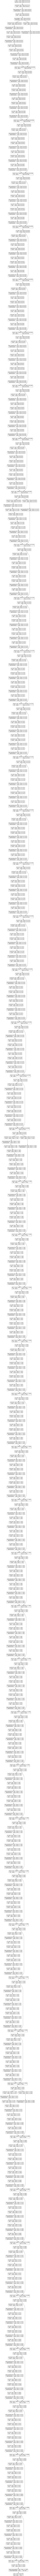

In [ ]:
#R3D50 structure as mentioned in : Content-Based Video Retrieval With Prototypes of Deep Features

from keras.layers import Conv3D, BatchNormalization, ReLU, Add, Input, MaxPooling3D, GlobalAvgPool3D, Dense, ZeroPadding3D
#Conv-Batchnorm_relu block
def conv_batchnorm_relu(x, filters, kernel_size, strides=1):

  x = Conv3D(filters=filters, kernel_size=kernel_size, strides=strides, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  return x

#Identity block

def identity_block(tensor, filters):
  x = conv_batchnorm_relu(tensor, filters=filters, kernel_size=1, strides=1)
  x = conv_batchnorm_relu(x, filters=filters, kernel_size=3, strides=1)
  x = conv_batchnorm_relu(x, filters=4*filters, kernel_size=1, strides=1)
  x = BatchNormalization()(x)
  x = Add()([tensor, x])  #Skip connention
  x = ReLU()(x)

  return x

def projection_block(tensor, filters, strides):

  #left stream
  x = conv_batchnorm_relu(tensor, filters=filters, kernel_size=1, strides=strides)
  x = conv_batchnorm_relu(x, filters=filters, kernel_size=3, strides=1)
  x = conv_batchnorm_relu(x, filters=4*filters, kernel_size=3, strides=1)
  x = BatchNormalization()(x)

  #right stream

  shortcut = Conv3D(filters=4*filters, kernel_size=1, strides=strides)(tensor)
  shortcut = BatchNormalization()(shortcut)

  x = Add()([shortcut, x])

  #skip connection
  x = ReLU()(x)

  return x

#Resnet block

def resnet_block(x, filters, reps, strides):

  x = projection_block(x, filters, strides)


  for i in range(0, (reps-1)):
    x = identity_block(x, filters)

  return x

#Model

from keras.models import Model

input = Input(shape=(16, 112, 112, 3))

#x = ZeroPadding2D(padding=3)(input)

x = conv_batchnorm_relu(input, filters=64, kernel_size=(3, 7, 7), strides=(2, 2, 2))
#x = ZeroPadding2D(padding=1)(x)
x = MaxPooling3D(pool_size = (1, 1, 1), strides = (1, 2, 2))(x)
#(3, 4, 6, 3)
#Block1
x = resnet_block(x, filters=64, reps=3*3, strides=(1, 1, 1))
#Block2
x = resnet_block(x, filters=128, reps=4*3, strides=(2, 2, 2))
#Block3
x = resnet_block(x, filters=256, reps=6*3, strides=(2, 2, 2))
#Block4
x = resnet_block(x, filters=512, reps=3*3, strides=(2, 2, 2))
#Average pooling
x = GlobalAvgPool3D()(x)

#output = x
#Fully connected layer
output = Dense(7, activation='softmax')(x)

model = Model(inputs=input, outputs=output)

model.summary()

# Visualize the model
import keras
keras.utils.plot_model(model, expand_nested=True, dpi=60, show_shapes=True)

In [ ]:
import os

import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
#from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential

import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import img_to_array
from keras.optimizers import SGD



model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy"])

earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=4,
                   epochs=100, verbose=1, shuffle=True)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 16, 112, 112, 3)]    0         []                            
                                                                                                  
 conv3d_149 (Conv3D)         (None, 8, 56, 56, 64)        28288     ['input_2[0][0]']             
                                                                                                  
 batch_normalization_197 (B  (None, 8, 56, 56, 64)        256       ['conv3d_149[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_193 (ReLU)            (None, 8, 56, 56, 64)        0         ['batch_normalization_19

In [ ]:
len(Y)

649

In [ ]:
print(X.shape)

(649, 16, 112, 112, 3)


In [ ]:
import numpy as np

np.save("X1.npy", X)
np.save("Y1.npy", Y)

In [ ]:
import shutil
shutil.copy('/content/X1.npy','/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X1.npy')
shutil.copy('/content/Y1.npy','/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y1.npy')

'/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y1.npy'

In [ ]:
Y[600]

'TaiChi'

In [ ]:
import numpy as np

X = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X.npy')
Y = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y.npy')

X1 = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X1.npy')
Y1 = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y1.npy')

In [ ]:
X_fin = []
Y_fin = []


for i in range(len(X)):
  X_fin.append(X[i])

for i in range(len(Y)):
  Y_fin.append(Y[i])


for i in range(len(X1)):
  X_fin.append(X1[i])

for i in range(len(Y1)):
  Y_fin.append(Y1[i])


In [ ]:
X_fin = np.asarray(X_fin)
Y_fin = np.asarray(Y_fin)

In [ ]:
import numpy as np

np.save("X_fin.npy", X_fin)
np.save("Y_fin.npy", Y_fin)

In [ ]:
import shutil

shutil.copy('/content/X_fin.npy','/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X_fin.npy')
shutil.copy('/content/Y_fin.npy','/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y_fin.npy')

'/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y_fin.npy'

In [ ]:
import numpy as np

X = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X_fin.npy')
Y = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/Y_fin.npy')

In [ ]:
X.shape

(9537, 16, 112, 112, 3)

In [ ]:
Y.shape

(9537,)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object
onehotencoder = OneHotEncoder()

Y_enc = onehotencoder.fit_transform(Y.reshape(-1,1))

Y_enc

<9537x101 sparse matrix of type '<class 'numpy.float64'>'
	with 9537 stored elements in Compressed Sparse Row format>

In [ ]:
print(Y_enc)

  (0, 46)	1.0
  (1, 46)	1.0
  (2, 46)	1.0
  (3, 46)	1.0
  (4, 46)	1.0
  (5, 46)	1.0
  (6, 46)	1.0
  (7, 46)	1.0
  (8, 46)	1.0
  (9, 46)	1.0
  (10, 46)	1.0
  (11, 46)	1.0
  (12, 46)	1.0
  (13, 46)	1.0
  (14, 46)	1.0
  (15, 46)	1.0
  (16, 46)	1.0
  (17, 46)	1.0
  (18, 46)	1.0
  (19, 46)	1.0
  (20, 46)	1.0
  (21, 46)	1.0
  (22, 46)	1.0
  (23, 46)	1.0
  (24, 46)	1.0
  :	:
  (9512, 78)	1.0
  (9513, 78)	1.0
  (9514, 78)	1.0
  (9515, 78)	1.0
  (9516, 78)	1.0
  (9517, 78)	1.0
  (9518, 78)	1.0
  (9519, 78)	1.0
  (9520, 78)	1.0
  (9521, 78)	1.0
  (9522, 78)	1.0
  (9523, 78)	1.0
  (9524, 78)	1.0
  (9525, 78)	1.0
  (9526, 78)	1.0
  (9527, 78)	1.0
  (9528, 78)	1.0
  (9529, 78)	1.0
  (9530, 78)	1.0
  (9531, 78)	1.0
  (9532, 78)	1.0
  (9533, 78)	1.0
  (9534, 78)	1.0
  (9535, 78)	1.0
  (9536, 78)	1.0


In [ ]:
Y_fin

array(['JumpRope', 'JumpRope', 'JumpRope', ..., 'Shotput', 'Shotput',
       'Shotput'], dtype='<U18')

In [ ]:
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object
onehotencoder = OneHotEncoder()


# define example
#data = np.array(['dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])

label_encoder = LabelEncoder()
data_train = label_encoder.fit_transform(Y_fin)
# one hot encode
encoded = to_categorical(data_train)
data_train

Y_enc = onehotencoder.fit_transform(data_train.reshape(-1, 1))

Y_enc

<9537x101 sparse matrix of type '<class 'numpy.float64'>'
	with 9537 stored elements in Compressed Sparse Row format>

In [ ]:
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric




X_train, X_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.20, shuffle=True, random_state=0)

In [ ]:
np.save('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X_train.npy', X_train)
np.save('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X_test.npy', X_test)
np.save('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/y_train.npy', y_train)
np.save('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/y_test.npy', y_test)


In [ ]:
import numpy as np

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

X_train = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X_train.npy')
X_test = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/X_test.npy')
y_train = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/y_train.npy')
y_test = np.load('/content/drive/MyDrive/RESEARCH/DEEP_NETWORK/y_test.npy')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7629, 16, 112, 112, 3)
(1908, 16, 112, 112, 3)


In [ ]:
#Training Session of 3DCNN
import os

import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
#from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
#from sklearn.model_selection import train_test_split


model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(
    X_train.shape[1:]), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(128, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(128, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer='Adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=8,
                    epochs=100, verbose=1, shuffle=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_2 (Conv3D)           (None, 16, 112, 112, 32   2624      
                             )                                   
                                                                 
 activation_2 (Activation)   (None, 16, 112, 112, 32   0         
                             )                                   
                                                                 
 conv3d_3 (Conv3D)           (None, 16, 112, 112, 32   27680     
                             )                                   
                                                                 
 activation_3 (Activation)   (None, 16, 112, 112, 32   0         
                             )                                   
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 6, 38, 38, 32)    

In [ ]:
import os

import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
#from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential

import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import img_to_array
from keras.optimizers import SGD


model = Sequential()

model.add(LSTM(units=512, input_shape=(16, 37632), return_sequences=False, dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))


ValueError: ignored

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model('/content/lstm_ex')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy"])

earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=4,
                    epochs=100, verbose=1, shuffle=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               78120960  
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 78387207 (299.02 MB)
Trainable params: 78387207 (299.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


ValueError: ignored

In [ ]:
model.save('lstm_ex')

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2,
                   epochs=10, verbose=1, shuffle=True)


In [ ]:
#Training Session of 3DCNN
import os

import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
#from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
#from sklearn.model_selection import train_test_split


model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(
    X_train.shape[1:]), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer='Adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=8,
                    epochs=100, verbose=1, shuffle=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 16, 112, 112, 32   2624      
                             )                                   
                                                                 
 activation_12 (Activation)  (None, 16, 112, 112, 32   0         
                             )                                   
                                                                 
 conv3d_13 (Conv3D)          (None, 16, 112, 112, 32   27680     
                             )                                   
                                                                 
 activation_13 (Activation)  (None, 16, 112, 112, 32   0         
                             )                                   
                                                                 
 max_pooling3d_6 (MaxPoolin  (None, 6, 38, 38, 32)    

In [ ]:
#CREATE DATASET
import os
import numpy as np
import cv2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
#import keras_metrics as km
from tensorflow.python.keras.metrics import Metric


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array



classes = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#classes = ['PullUps', 'CricketShot', 'WritingOnBoard', 'Drumming', 'ParallelBars', 'ApplyEyeMakeup', 'PommelHorse', 'HighJump', 'JumpingJack', 'SumoWrestling', 'BandMarching', 'ApplyLipstick', 'Archery', 'LongJump', 'CleanAndJerk', 'BalanceBeam', 'MoppingFloor', 'PlayingDaf', 'TableTennisShot', 'Knitting']
#classes = ['JumpRope', 'IceDancing', 'BodyWeightSquats', 'Basketball', 'CliffDiving', 'JumpingJack', 'PlayingCello', 'PushUps', 'PizzaTossing', 'WritingOnBoard', 'PlayingTabla', 'Swing', 'Lunges', 'Biking', 'FrisbeeCatch', 'PullUps', 'HandstandPushups', 'PlayingPiano', 'CricketBowling', 'Fencing', 'PlayingFlute', 'FrontCrawl', 'Rafting', 'SkyDiving', 'CleanAndJerk', 'PlayingViolin', 'TaiChi', 'SkateBoarding', 'BlowDryHair', 'Drumming', 'Rowing', 'BoxingPunchingBag', 'Mixing', 'PlayingDhol', 'SalsaSpin', 'FloorGymnastics', 'Skiing', 'RopeClimbing', 'Hammering', 'ApplyEyeMakeup', 'FieldHockeyPenalty', 'ShavingBeard', 'TennisSwing', 'HeadMassage', 'ParallelBars', 'Kayaking', 'PlayingDaf', 'StillRings', 'HorseRace', 'Typing', 'BrushingTeeth', 'PoleVault', 'BaseballPitch', 'CuttingInKitchen']
#classes = ['Haircut', 'BoxingSpeedBag', 'YoYo', 'SoccerJuggling', 'HammerThrow', 'Billiards', 'PlayingSitar', 'BalanceBeam', 'TableTennisShot', 'Nunchucks', 'MoppingFloor', 'VolleyballSpiking', 'JugglingBalls', 'HandstandWalking', 'SoccerPenalty', 'WalkingWithDog', 'BenchPress', 'Punch', 'JavelinThrow', 'RockClimbingIndoor', 'UnevenBars', 'BreastStroke', 'GolfSwing', 'Diving', 'BabyCrawling', 'BandMarching', 'SumoWrestling', 'HorseRiding', 'HighJump', 'BlowingCandles', 'ThrowDiscus', 'Bowling', 'BasketballDunk', 'CricketShot', 'MilitaryParade', 'LongJump', 'Archery', 'Surfing', 'WallPushups', 'ApplyLipstick', 'HulaHoop', 'Skijet', 'TrampolineJumping', 'PommelHorse', 'PlayingGuitar', 'Knitting', 'Shotput']
X = []
Y = []

height = 112
width  = 112
depth = 16
color = True
skip = True

input_dir = "/content/PCA-CBVR/DB/UCF101/Test/videos"

classes_list = classes#os.listdir(input_dir)

for c in classes_list:
  print(c)
  files_list = os.listdir(os.path.join(input_dir, c))
  for f in files_list:
    print(f)
    filename = "/content/PCA-CBVR/DB/UCF101/Test/videos/" + c + "/" + f
    cap = cv2.VideoCapture(filename)
    nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    if skip:
        frames = [x * nframe / depth for x in range(depth)]
    else:
        frames = [x for x in range(depth)]
    framearray = []

    for i in range(depth):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
        ret, frame = cap.read()
        frame = cv2.resize(frame, (height, width))
        if color:
            framearray.append(frame)
        else:
            framearray.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

    cap.release()
    X.append(framearray)
    y = [0]*len(classes)
    y[classes.index(c)] = 1
    Y.append(y)
    #Y.append(c)

X = np.asarray(X)
Y = np.asarray(Y)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)


Biking
v_Biking_g03_c02.avi
v_Biking_g04_c02.avi
v_Biking_g02_c03.avi
v_Biking_g02_c04.avi
v_Biking_g01_c04.avi
v_Biking_g05_c07.avi
v_Biking_g04_c01.avi
v_Biking_g03_c01.avi
v_Biking_g04_c03.avi
v_Biking_g05_c02.avi
v_Biking_g01_c03.avi
v_Biking_g01_c01.avi
v_Biking_g02_c06.avi
v_Biking_g07_c04.avi
v_Biking_g03_c04.avi
v_Biking_g06_c01.avi
v_Biking_g04_c04.avi
v_Biking_g02_c01.avi
v_Biking_g05_c01.avi
v_Biking_g03_c03.avi
v_Biking_g02_c05.avi
v_Biking_g05_c04.avi
v_Biking_g05_c06.avi
v_Biking_g02_c07.avi
v_Biking_g02_c02.avi
v_Biking_g06_c03.avi
v_Biking_g05_c03.avi
v_Biking_g07_c01.avi
v_Biking_g05_c05.avi
v_Biking_g07_c03.avi
v_Biking_g06_c05.avi
v_Biking_g06_c02.avi
v_Biking_g04_c05.avi
v_Biking_g01_c02.avi
v_Biking_g06_c04.avi
v_Biking_g07_c05.avi
v_Biking_g07_c06.avi
v_Biking_g07_c02.avi
JumpingJack
v_JumpingJack_g02_c01.avi
v_JumpingJack_g01_c01.avi
v_JumpingJack_g03_c01.avi
v_JumpingJack_g02_c03.avi
v_JumpingJack_g02_c04.avi
v_JumpingJack_g06_c01.avi
v_JumpingJack_g03_c02.avi
v

In [ ]:
Y_PRED = np.asarray(model.predict(X))

8/8 [==============================] - 1s 52ms/step


In [ ]:
Y_PRED.shape

(246, 7)

In [ ]:
Y.shape

(246, 7)

In [ ]:
#normal 3DCNN
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.6626016260162602

In [ ]:
#R3D50 with 10 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.15853658536585366

In [ ]:
#R3D50 with 100 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.4065040650406504

In [ ]:
#VGG16 + convLSTM with 10 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.8780487804878049

In [ ]:
#R3D50layer3output + convLSTM with 10 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.943089430894309

In [ ]:
#R3D50layer3output + convLSTM with 30 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.9390243902439024

In [ ]:
#R3D50layer3output + LSTM with 20 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.943089430894309

In [ ]:
#R3D50layer2output + convLSTM with 40 epochs
from sklearn.metrics import accuracy_score

accuracy_score(Y_ACT, Y_PRED1)

0.8577235772357723

In [ ]:
Y_PRED1 = np.argmax(Y_PRED, axis=1)
Y_PRED1

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 6, 1, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3,
       3, 6, 3, 6, 6, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 2, 5, 5, 2,
       5, 2, 4, 5, 5, 5, 5, 5, 2, 2, 4, 2, 5, 5, 5, 5, 5, 5, 5, 5, 6, 0,
       6, 0, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 3, 0])

In [ ]:
Y_ACT = np.argmax(Y, axis=1)
Y_ACT

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6])

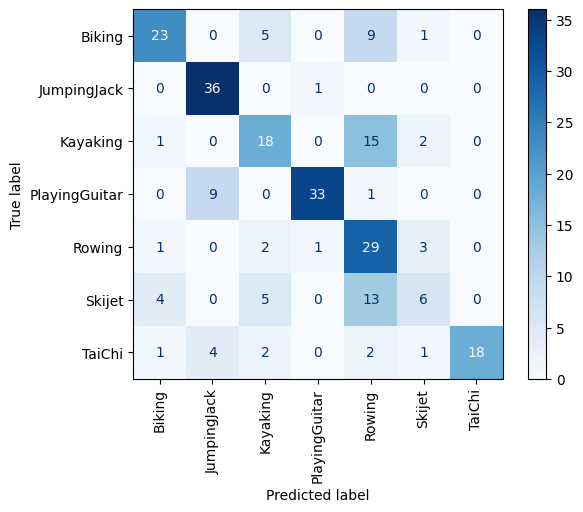

In [ ]:
# Normal 3D CNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


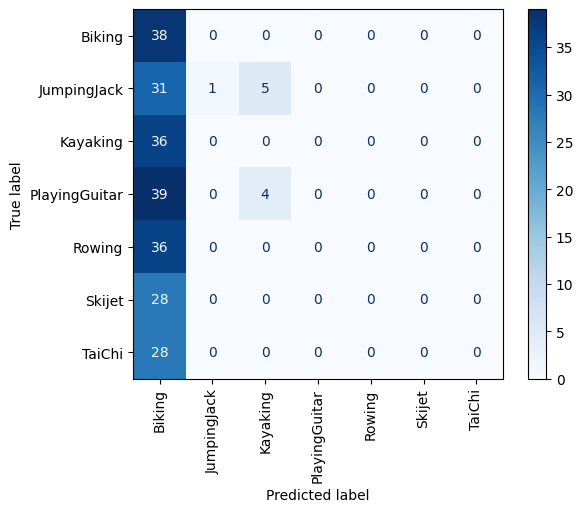

In [ ]:
#R3D50 epochs 10
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


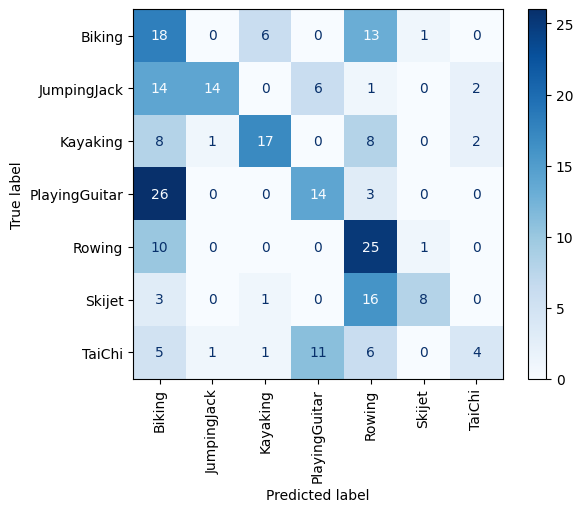

In [ ]:
#R3D50 epochs 100
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


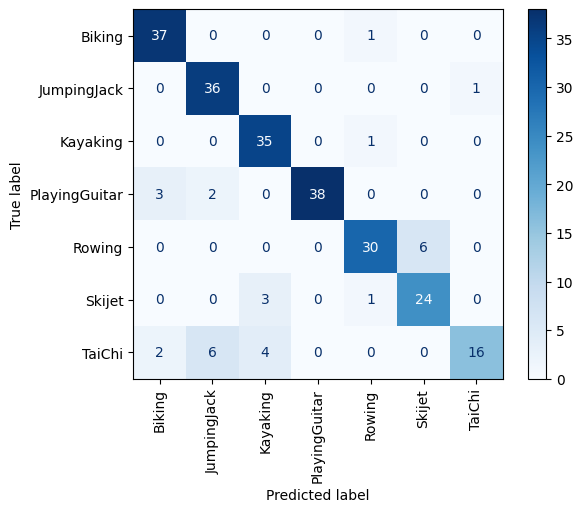

In [ ]:
#VGG16 + LSTM 10 epochs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


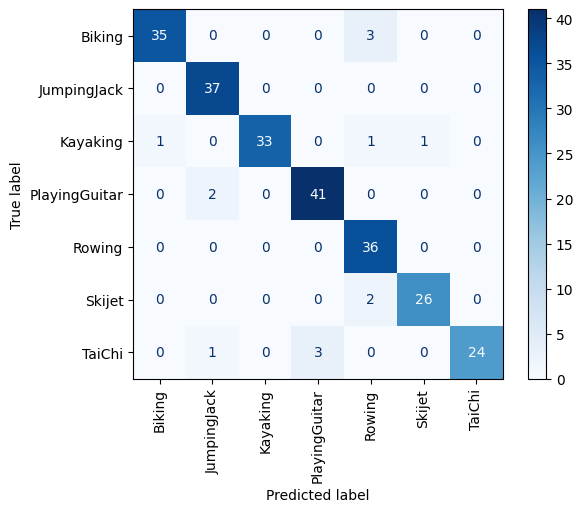

In [ ]:
#R3D50layer3output + convLSTM 10 epochs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


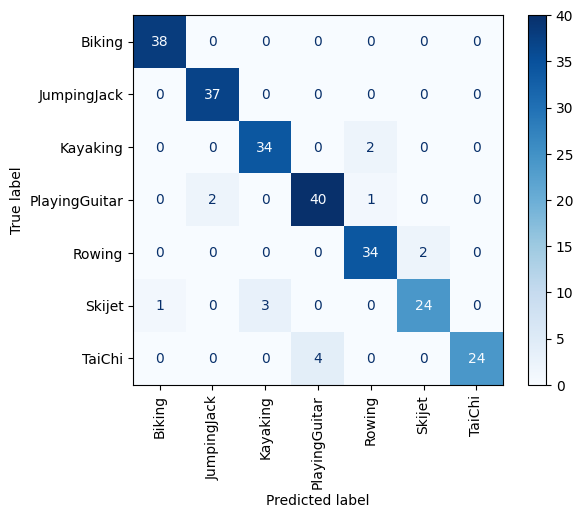

In [ ]:
#R3D50layer3output + convLSTM 30 epochs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


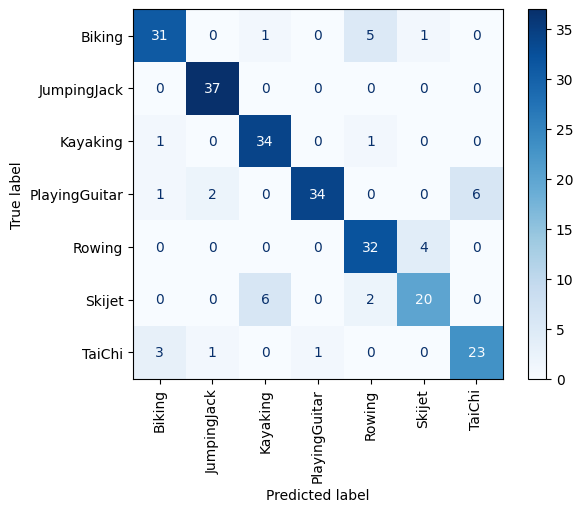

In [ ]:
#R3D50layer2output + convLSTM 40 epochs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


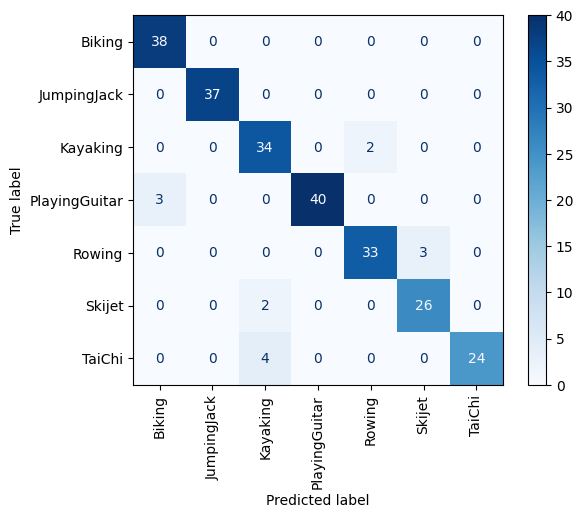

In [ ]:
#R3D50layer3output + LSTM 20 epochs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix(Y_ACT, Y_PRED1)

cm = confusion_matrix(Y_ACT, Y_PRED1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot(include_values=True, cmap='Blues',xticks_rotation='vertical')
plt.show()


In [ ]:
#Training Session of 3DCNN
import os

import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
#from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
#from sklearn.model_selection import train_test_split


model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(
    X_train.shape[1:]), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))

model.add(Conv3D(128, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv3D(128, kernel_size=(3, 3, 3), padding='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), padding='same'))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(101, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer='Adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=4,
                    epochs=10, verbose=1, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 16, 112, 112, 32   2624      
                             )                                   
                                                                 
 activation (Activation)     (None, 16, 112, 112, 32   0         
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 16, 112, 112, 32   27680     
                             )                                   
                                                                 
 activation_1 (Activation)   (None, 16, 112, 112, 32   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 6, 38, 38, 32)     0

In [ ]:
#Training Session of 3DCNN
import os

import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split


model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(X_train.shape[1:]), padding='same'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(101, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer='Adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=4,
                    epochs=10, verbose=1, shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 16, 112, 112, 32   2624      
                             )                                   
                                                                 
 flatten (Flatten)           (None, 6422528)           0         
                                                                 
 dropout (Dropout)           (None, 6422528)           0         
                                                                 
 dense (Dense)               (None, 101)               648675429 
                                                                 
Total params: 648678053 (2.42 GB)
Trainable params: 648678053 (2.42 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
data_train.shape

(9537,)

In [ ]:
!git clone https://github.com/aprameya2001/Video-Retrieval-using-Deep-Learning.git

In [ ]:
print(X_train.shape)
print(X_test.shape)

NameError: ignored

In [ ]:
from keras import backend as K
from keras.layers import Input, Dense, Flatten, Activation, Dropout, Bidirectional, Permute, multiply
from keras.layers import LSTM
from keras.callbacks import CSVLogger
from keras.models import Sequential, Model, load_model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.optimizers import SGD
#from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import os
import time
import numpy as np
#from video_classification.generator.cnn_feature_extractor import CNN_Feature_extractor

#K.set_image_dim_ordering('tf')

NUM_EPOCHS = 60
VERBOSE = 1
HIDDEN_UNITS = 256


def attention_block(inputs, time_steps):
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = multiply([inputs, a_probs], name='attention_mul')
    return output_attention_mul

def generate_batch(x_samples, y_samples, batch_size, expected_frames):
    num_batches = len(x_samples) // batch_size

    while True:
        for batchIdx in range(0, num_batches):
            start = batchIdx * batch_size
            end = (batchIdx + 1) * batch_size
            x_data = []
            for k in range(start, end):
                x = np.load(x_samples[k])
                frames = x.shape[0]
                if frames > expected_frames:
                    x = x[0:expected_frames, :]
                    x_data.append(x)
                elif frames < expected_frames:
                    temp = np.zeros(shape=(expected_frames, x.shape[1]))
                    temp[0:frames, :] = x
                    x_data.append(temp)
                else:
                    x_data.append(x)

            yield np.array(x_data), y_samples[start:end]


class BidirectionalLSTMVideoClassifier(object):
    def __init__(self, cnn_model_name, model_file=None):
        self.num_input_tokens = None
        self.nb_classes = None
        if model_file is None:
            self.model = None
        else:
            self.model = load_model(model_file)
        self.cnn_model_name = cnn_model_name.lower()

    def cnn_lstm(self):
        model = Sequential()
        model.add(Bidirectional(LSTM(units=HIDDEN_UNITS, return_sequences=False),
                                input_shape=(self.expected_frames, self.num_input_tokens)))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(self.nb_classes))
        model.add(Activation('softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        return model

    def cnn_attention_lstm(self):
        inputs = Input(shape=(self.expected_frames, self.num_input_tokens,))
        attention_inputs = attention_block(inputs, self.expected_frames)
        lstm_out = Bidirectional(LSTM(HIDDEN_UNITS, return_sequences=False))(attention_inputs)
        x = Dense(512, activation='relu')(lstm_out)
        x = Dropout(0.5)(x)
        x = Dense(self.nb_classes, activation='softmax')(x)
        model = Model(input=[inputs], output=x)
        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        print(model.summary())
        return model

    def cnn_lstm_attention(self):
        inputs = Input(shape=(self.expected_frames, self.num_input_tokens,))
        lstm_out = Bidirectional(LSTM(HIDDEN_UNITS, return_sequences=True))(inputs)
        attention_mul = attention_block(lstm_out, self.expected_frames)
        attention_mul = Flatten()(attention_mul)
        x = Dense(512, activation='relu')(attention_mul)
        x = Dropout(0.5)(x)
        x = Dense(self.nb_classes, activation='softmax')(x)
        model = Model(input=[inputs], output=x)
        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        print(model.summary())
        return model

In [ ]:
#for LSTM attention classifiers

#https://github.com/junyongyou/Attention-boosted-deep-networks-for-video-classification.git